In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_70861_U')

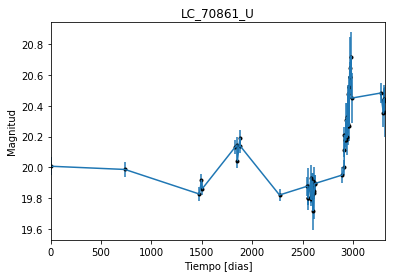

In [2]:
data = np.genfromtxt('LC_70861_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_70861_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

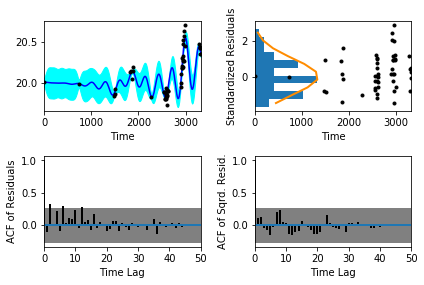

In [5]:
sample.assess_fit()

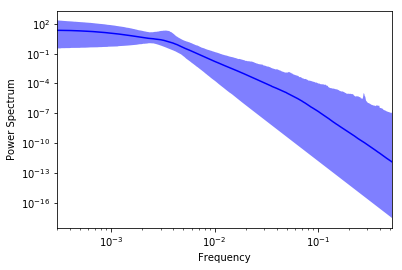

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_70861_U')

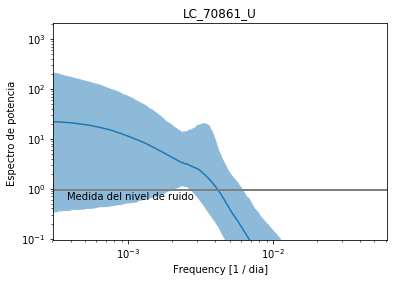

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_70861_U')

Text(0.5,1,'Prediccion , valor esperado 70861_U')

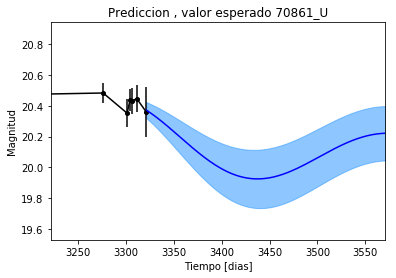

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 70861_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_70861_U')

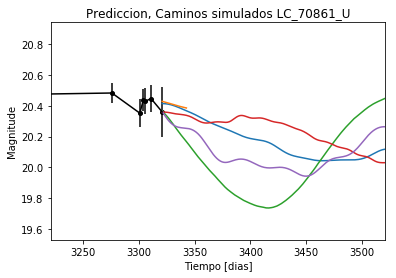

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_70861_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_70861_U')

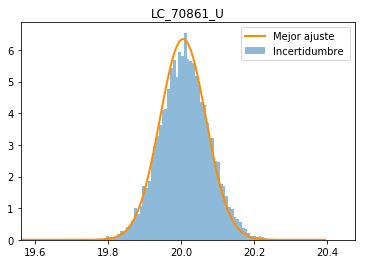

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_70861_U')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_U')

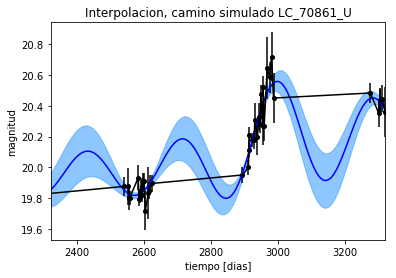

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_U')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_U')

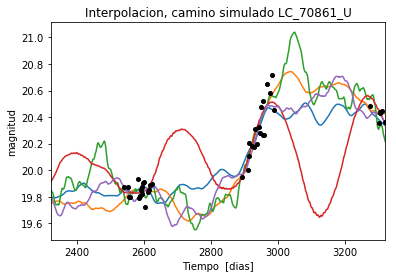

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 558.269349125
Median: 0.00393421553618
Standard deviation: 0.163524708647
68% credibility interval: [ 0.00056592  0.1054754 ]
95% credibility interval: [  3.20276892e-04   6.42060657e-01]
99% credibility interval: [  3.12770401e-04   9.10706854e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 635.972717612
Median: 0.00176940381676
Standard deviation: 0.0742484449347
68% credibility interval: [ 0.00048464  0.02066025]
95% credibility interval: [ 0.00031883  0.23901627]
99% credibility interval: [  3.08354250e-04   5.01495303e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 346.583905116
Median: 0.00788183179106
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 763.390934083
Median: 64.2410445385
Standard deviation: 2.17351344373
68% credibility interval: [ 62.20347746  66.394223  ]
95% credibility interval: [ 59.51118191  68.28471627]
99% credibility interval: [ 57.30368091  68.59656671]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 737.342159161
Median: 0.403970419386
Standard deviation: 1.84750453231
68% credibility interval: [ 0.03638199  3.04947776]
95% credibility interval: [ 0.01368162  6.30003365]
99% credibility interval: [ 0.01059521  8.59627432]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 926.197764364
Median: 0.143154534305
Standard deviation: 8.1399131102
68% credibility interval: [  5.07165895e-03   5.50773213e+00]
95% credibility interval: [  7.73

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7262.09073518
Median: 1.47819780505e-33
Standard deviation: 1.14132691096e+99
68% credibility interval: [  5.46950932e-60   1.56390578e-09]
95% credibility interval: [  2.93483432e-79   5.22283953e+63]
99% credibility interval: [  1.24752486e-90   1.74415270e+96]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3307.2337771
Median: 20.0600511969
Standard deviation: 0.132558024632
68% credibility interval: [ 19.94604682  20.15603181]
95% credibility interval: [ 19.78845956  20.31504144]
99% credibility interval: [ 19.59877664  20.49077715]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 334.442239168
Median: 0.00409303668345
Standard deviation: 0.23843426029
68% credibility interval: [ 0.          0.30382266]
95% credibility interval: [ 0.          0.87900059]
99% credibility interval: [ 0.          1.03282277]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 334.442239168
Median: 0.00409303668345
Standard deviation: 0.23843426029
68% credibility interval: [ 0.          0.30382266]
95% credibility interval: [ 0.          0.87900059]
99% credibility interval: [ 0.          1.03282277]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 114.390404314
Median: 0.0
Standard deviation: 0.00128882159646
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 763.390934083
Median: 64.2410445385
Standard deviation: 2.17351344373
68% credibility interval: [ 62.20347746  66.394223  ]
95% credibility interval: [ 59.51118191  68.28471627]
99% credibility interval: [ 57.30368091  68.59656671]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2916.9346705
Median: 0.0761827623297
Standard deviation: 0.131673830733
68% credibility interval: [ 0.03772347  0.16551967]
95% credibility interval: [ 0.02139924  0.3775097 ]
99% credibility interval: [ 0.01764225  0.74817299]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1129.23382886
Median: 1.00579945256
Standard deviation: 0.159511189946
68% credibility interval: [ 0.86341917  1.17231972]
95% credibility interval: [ 0.75679785  1.37464596]
99% credibility interval: [ 0.69475703  1.51870818]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2481.12748936
Median: 8.35898312527e-05
Standard deviation: 0.0887198048586
68% credibility interval: [  1.47304641e-06   4.20362147e-03]
95% credibility interval: [  2.91030565e-68   2.76607068e-02]
99% credibility interval: [  4.15740158e-101   1.23906277e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 558.269349125
Median: (-0.0247194052522-1.6786795353j)
Standard deviation: 1.81660379841
68% credibility interval: [-0.66272146+0.j         -0.00355581-0.02029691j]
95% credibility interval: [ -4.03418609e+00+0.j          -2.01235906e-03-0.02331893j]
99% credibility interval: [ -5.72213993e+00+0.j          -1.96519439e-03-0.02078271j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 635.972717612
Median: (-0.011117492064+1.76962336728j)
Standard deviation: 1.56908294858
68% credibility interval: [-0.12981217+5.31115146j -0.00304506+0.02228457j]
95% credibility interval: [-1.50178349+0.77463237j -0.00200327+0.02403088j]
99% credibility interval: [ -3.15098792e+00+4.12105457j  -1.93744690e-03+1.21327249j]
Posterior summar